In [1]:
%config InlineBackend.figure_format = "svg"
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Preprocessing

In [3]:
df = pd.read_csv("results.csv")
columns = {"Sort Function": "Parallel Quicksort", "Parallel": "Bucket Parallel"}
df.rename(columns=columns, inplace=True)
values = {"quicksort": 0, "quicksortparallel": 1}
df["Parallel Quicksort"].replace(values, inplace=True)
df.loc[df["Parallel Quicksort"]==0, "Cutoff"] = "Any"
df.loc[(df["Parallel Quicksort"]==0) & (df["Bucket Parallel"]==0), "Thread Count"] = "Any"

In [4]:
df

,Total Size,Number of Buckets,Thread Count,Parallel,Sort Function,Cutoff,I,CC,Texe,CPI
0,1000,10,1,1,quicksort,1,1.319060e+05,1.474280e+05,45.0,1.117675
1,1000,10,1,1,quicksort,1,1.310380e+05,1.152390e+05,29.0,0.879432
2,1000,10,1,1,quicksort,1,1.311700e+05,1.130680e+05,28.0,0.861996
3,1000,10,1,1,quicksort,1,1.339900e+05,1.123590e+05,28.0,0.838563
4,1000,10,1,1,quicksort,1,1.323370e+05,1.126420e+05,29.0,0.851175
...,...,...,...,...,...,...,...,...,...,...
414195,10000000,100000,12,0,quicksortparallel,10000,1.487897e+09,3.459795e+09,1111800.0,2.325292
414196,10000000,100000,12,0,quicksortparallel,10000,1.488115e+09,3.313714e+09,1076224.0,2.226786
414197,10000000,100000,12,0,quicksortparallel,10000,1.487574e+09,3.388244e+09,1094238.0,2.277698
414198,10000000,100000,12,0,quicksortparallel,10000,1.487755e+09,3.369585e+09,1089419.0,2.264879


# Plotting

In [313]:
def get_means_stds(x, y, num_runs=200):
    assert len(y) % num_runs == 0, print("Number of runs is incorrect")
    
    new_x, y_means, y_stds = [], [], []
    for i in range(int(len(y)/num_runs)):
        new_x.append(x[num_runs*i])
        y_means.append(y[num_runs*i:num_runs*(i+1)].mean())
        y_stds.append(y[num_runs*i:num_runs*(i+1)].std())
    
    new_x = np.array(new_x, dtype=float)
    y_means = np.array(y_means, dtype=float)
    y_stds = np.array(y_stds, dtype=float)
    
    return new_x, y_means, y_stds

def plot(ax, x, y_mean, y_std, cf, label, linestyle="-"):
    ax.plot(x, y_mean, label=label, linestyle=linestyle)
    ax.fill_between(x, y_mean - cf * y_std, y_mean + cf * y_std, alpha=0.2)
    
def Max(x):
    if x.size > 0:
        r = max(x)
    else:
        r = float("-inf")
    return r

def Min(x):
    if x.size > 0:
        r = min(x)
    else:
        r = float("Inf")
    return r

def plot_df_slice (df, x, y, filter_dict, num_runs=200, conf_interval=5, num_ticks=10, yscale="linear", xscale="linear", filename="plot.png", gain=False):
    # Filter dataframe copy
    config = ""
    df_cpy = df
    for i, key in enumerate(filter_dict):
        if key in ["Cutoff", "Thread Count"]:
            df_cpy.loc[df_cpy[key] == "Any", key] = filter_dict[key]
        config += f"{key}={filter_dict[key]}"
        if i != len(filter_dict) - 1:
            config += "\n"
        df_cpy = df_cpy[df_cpy[key] == filter_dict[key]]
    
    # Get Parallel Quicksort Parallel x and y data
    x_pp = df_cpy[(df_cpy["Bucket Parallel"]==1) & (df_cpy["Parallel Quicksort"]==1)][x].to_numpy()
    y_pp = df_cpy[(df_cpy["Bucket Parallel"]==1) & (df_cpy["Parallel Quicksort"]==1)][y].to_numpy()
    x_pp, y_pp_mean, y_pp_std = get_means_stds(x_pp, y_pp, num_runs)
    
    # Get Parallel Quicksort x and y data
    x_ps = df_cpy[(df_cpy["Bucket Parallel"]==1) & (df_cpy["Parallel Quicksort"]==0)][x].to_numpy()
    y_ps = df_cpy[(df_cpy["Bucket Parallel"]==1) & (df_cpy["Parallel Quicksort"]==0)][y].to_numpy()
    x_ps, y_ps_mean, y_ps_std = get_means_stds(x_ps, y_ps, num_runs)
    
    # Get Quicksort Parallel x and y data
    x_sp = df_cpy[(df_cpy["Bucket Parallel"]==0) & (df_cpy["Parallel Quicksort"]==1)][x].to_numpy()
    y_sp = df_cpy[(df_cpy["Bucket Parallel"]==0) & (df_cpy["Parallel Quicksort"]==1)][y].to_numpy()
    x_sp, y_sp_mean, y_sp_std = get_means_stds(x_sp, y_sp, num_runs)
    
    # Get Quicksort x and y data
    x_ss = df_cpy[(df_cpy["Bucket Parallel"]==0) & (df_cpy["Parallel Quicksort"]==0)][x].to_numpy()
    y_ss = df_cpy[(df_cpy["Bucket Parallel"]==0) & (df_cpy["Parallel Quicksort"]==0)][y].to_numpy()
    x_ss, y_ss_mean, y_ss_std = get_means_stds(x_ss, y_ss, num_runs)
    
    # Gains
    if gain:
        y = "Gain " + y
        if len(x_pp) > 0:
            y_pp_std[:] = np.sqrt((y_pp_std[0]/y_pp_mean[:])**2 + (y_pp_mean[0] * y_pp_std[:] / (y_pp_mean[:]**2))**2)
            y_pp_mean[:] = y_pp_mean[0] / y_pp_mean[:]
        if len(x_ps) > 0:
            y_ps_std[:] = np.sqrt((y_ps_std[0]/y_ps_mean[:])**2 + (y_ps_mean[0] * y_ps_std[:] / (y_ps_mean[:]**2))**2)
            y_ps_mean[:] = y_ps_mean[0] / y_ps_mean[:]
        if len(x_sp) > 0:
            y_sp_std[:] = np.sqrt((y_sp_std[0]/y_sp_mean[:])**2 + (y_sp_mean[0] * y_sp_std[:] / (y_sp_mean[:]**2))**2)
            y_sp_mean[:] = y_sp_mean[0] / y_sp_mean[:]
        if len(x_ss) > 0:
            y_ss_std[:] = np.sqrt((y_ss_std[0]/y_ss_mean[:])**2 + (y_ss_mean[0] * y_ss_std[:] / (y_ss_mean[:]**2))**2)
            y_ss_mean[:] = y_ss_mean[0] / y_ss_mean[:]
    
    # Plot with matplotlib
    fig, ax = plt.subplots()
    if gain: plot(ax, x_pp, x_pp, [0 for _ in x_pp], 1, label="Ideal gain", linestyle="--")
    if len(x_pp) > 0: plot(ax, x_pp, y_pp_mean, y_pp_std, conf_interval, label="PBPQ")
    if len(x_ps) > 0 and x!="Cutoff": plot(ax, x_ps, y_ps_mean, y_ps_std, conf_interval, label="PBSQ")
    if len(x_sp) > 0: plot(ax, x_sp, y_sp_mean, y_sp_std, conf_interval, label="SBPQ")
    if len(x_ss) > 0 and (x!="Thread Count" and x!="Cutoff"): plot(ax, x_ss, y_ss_mean, y_ss_std, conf_interval, label="SBSQ")
    
    # Additional plot settings
    props = dict(boxstyle='square', facecolor='white')
    ax.text(1.025, 0.85, config, transform=ax.transAxes, fontsize=10, bbox=props)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_yscale(yscale)
    ax.set_xscale(xscale)
    plt.minorticks_on()
    ax.grid(b=True, which="major", linestyle="-")
    ax.grid(b=True, which="minor", linestyle="--")
    plt.legend()
    plt.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0.2)
    plt.show()

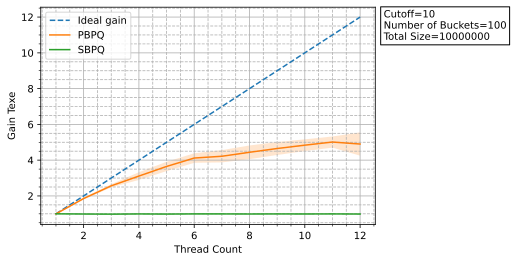

In [323]:
filter_dict = {
    "Cutoff": 10,
    "Number of Buckets": 100,
    "Total Size": 10000000
}

plot_df_slice(df, x="Thread Count", y="Texe", filter_dict=filter_dict, conf_interval=2, num_ticks=5, yscale="linear", xscale="linear", filename="Plots/plot1", gain=True)